In [15]:
import sys
sys.path.append("../")

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import *
from plot_skylocs_bands import LimitPlot

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
plots_dir = "/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/plots_darksky/"

# Plot

In [34]:
nmc = 10

xsec_max_ary = np.zeros((5,nmc))
xu1 = np.zeros((5,nmc))
xu2 = np.zeros((5,nmc))
xl1 = np.zeros((5,nmc))
xl2 = np.zeros((5,nmc))





limit_ary = np.zeros((5,nmc))
maxts_ary = np.zeros((5,nmc))

for idm, dm in enumerate(tqdm_notebook([1,3,5,7,9])):
    plot_mc = LimitPlot(data_dir='/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_loc0_inj10000_dm' + str(dm)+'/',
                        elephant=True, 
                        nmc=nmc, 
                        halos_ran=300, 
                        halos_to_keep=300,
                        data_type="mc",
                        bcut=20,
                        nonoverlap=True,
                        nonoverlapradius=2.,
                        cut_0p5=False,
                        xsecslim=10,
                        TS100=9,
                        TS1000=9,
                        file_prefix='LL2_TSmx_lim_b_noJprof_emin4_emax30_o',
                        elephantm = [52]) # 52 for 10 TeV
    limit_ary_temp, xsec_max_ary_temp, xu1_temp, xu2_temp, xl1_temp, xl2_temp, maxts_ary_temp = plot_mc.return_limits()
    
    xsec_max_ary[idm] = xsec_max_ary_temp[-1,52,:]
    xu1[idm] = xu1_temp[-1,52,:]
    xu2[idm] = xu2_temp[-1,52,:]
    xl1[idm] = xl1_temp[-1,52,:]
    xl2[idm] = xl2_temp[-1,52,:]


    limit_ary[idm] = limit_ary_temp[-1,52,:]
    maxts_ary[idm] = maxts_ary_temp[-1,52,:]
    
xsec_max = np.log10(np.percentile(xsec_max_ary, [16,50,84], axis=1))
xu1_max = np.log10(np.percentile(xu1, [16,50,84], axis=1))
xu2_max = np.log10(np.percentile(xu2, [16,50,84], axis=1))
xl1_max = np.log10(np.percentile(xl1, [16,50,84], axis=1))
xl2_max = np.log10(np.percentile(xl2, [16,50,84], axis=1))





lims = np.log10(np.percentile(10**limit_ary, [16,50,84], axis=1))
maxtss = np.percentile(10**maxts_ary, [16,50,84], axis=1)

/tigress/smsharma/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:55: RuntimeWarning: overflow encountered in power


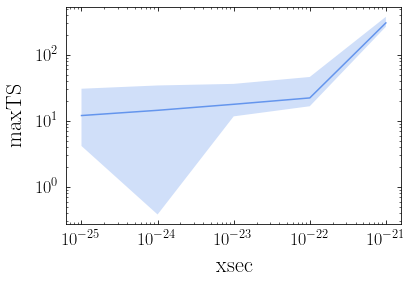

In [18]:
plt.plot(np.logspace(-21,-25,5), np.percentile(maxts_ary, [50], axis=1)[0])
plt.fill_between(np.logspace(-21,-25,5), np.percentile(maxts_ary, [16], axis=1)[0], np.percentile(maxts_ary, [84], axis=1)[0], alpha= 0.3)

plt.yscale("log")
plt.xscale("log")

plt.xlabel("xsec")
plt.ylabel("maxTS")

In [81]:
LL2 = np.load("/tigress/nrodd/DM-Catalog-Scan/Scan-Small-ROI/data/DarkSky_sid_loc1_inj10000_dm9/LL2_TSmx_lim_b_o0_mc0.npz")['LL2'][52]

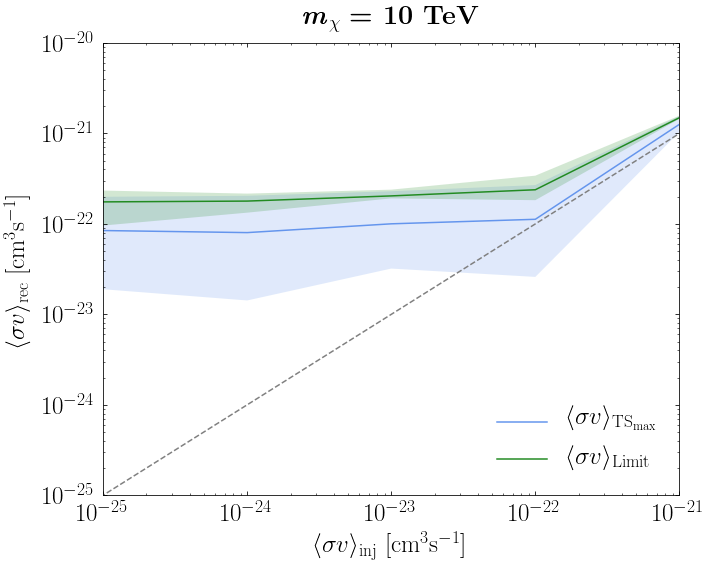

In [39]:
plot_h = 10/1.
plot_w = 8/1.

fig, ax = plt.subplots(1, figsize=(plot_h, plot_w))
# plt.plot(np.logspace(-21,-25,5),  10**xsec_max[1], label='$\langle\sigma v \\rangle_\mathrm{TS_{max}}$')

# plt.plot(np.logspace(-21,-25,5),  10**xu2_max[1], label='$\langle\sigma v \\rangle_\mathrm{TS_{max}}$')
# plt.plot(np.logspace(-21,-25,5),  10**xl2_max[1], label='$\langle\sigma v \\rangle_\mathrm{TS_{max}}$')

fudge = 2.

plt.plot(np.logspace(-21,-25,5),  fudge*10**xsec_max[1], label='$\langle\sigma v \\rangle_\mathrm{TS_{max}}$')
# plt.fill_between(np.logspace(-21,-25,5),  10**xl1_max[0], 10**xu1_max[2], alpha=0.4)
plt.fill_between(np.logspace(-21,-25,5),  fudge*10**xl2_max[1], fudge*10**xu2_max[1], alpha=0.2)
plt.plot(np.logspace(-21,-25,5),  fudge*10**lims[1], label='$\langle\sigma v \\rangle_\mathrm{Limit}$')
plt.fill_between(np.logspace(-21,-25,5),  fudge*10**lims[0], fudge*10**lims[2], alpha=0.2)
plt.plot([10**-26,10**-20],[10**-26,10**-20],ls='--', color='grey')
plt.xlabel("$\langle \sigma v \\rangle_\mathrm{inj}$ [cm$^3$s$^{-1}$]", fontsize=25)
plt.ylabel("$\langle \sigma v \\rangle_\mathrm{rec}$ [cm$^3$s$^{-1}$]", fontsize=25)
plt.ylim(10**-25,10**-20)
plt.xlim(10**-25,10**-21)
plt.xticks(fontsize=25);
plt.yticks(fontsize=25);
plt.yscale("log")
plt.xscale("log")
plt.legend(ncol=1,fancybox=True,facecolor='none',frameon=False, loc='lower right', fontsize=25)
plt.title("\\textbf{\emph{m}}$\mathbf{_\chi}$ \\textbf{= 10 TeV}", fontsize=27,y=1.02)
plt.tight_layout()
plt.savefig(plots_dir + "signal_recovery_10TeV_noJuncert.pdf")
plt.show()